Tipo de Institución y Área de Conocimiento: Analizar la frecuencia relativa de las áreas de conocimiento más populares dentro de cada tipo de institución. Por ejemplo, ¿los CFTs se concentran más en "Tecnología" mientras que las Universidades en "Ciencias Sociales"?

In [1]:
# Cargar datos e importar librerías
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../data/matriculas_ed_superior_nuble_2021.csv');

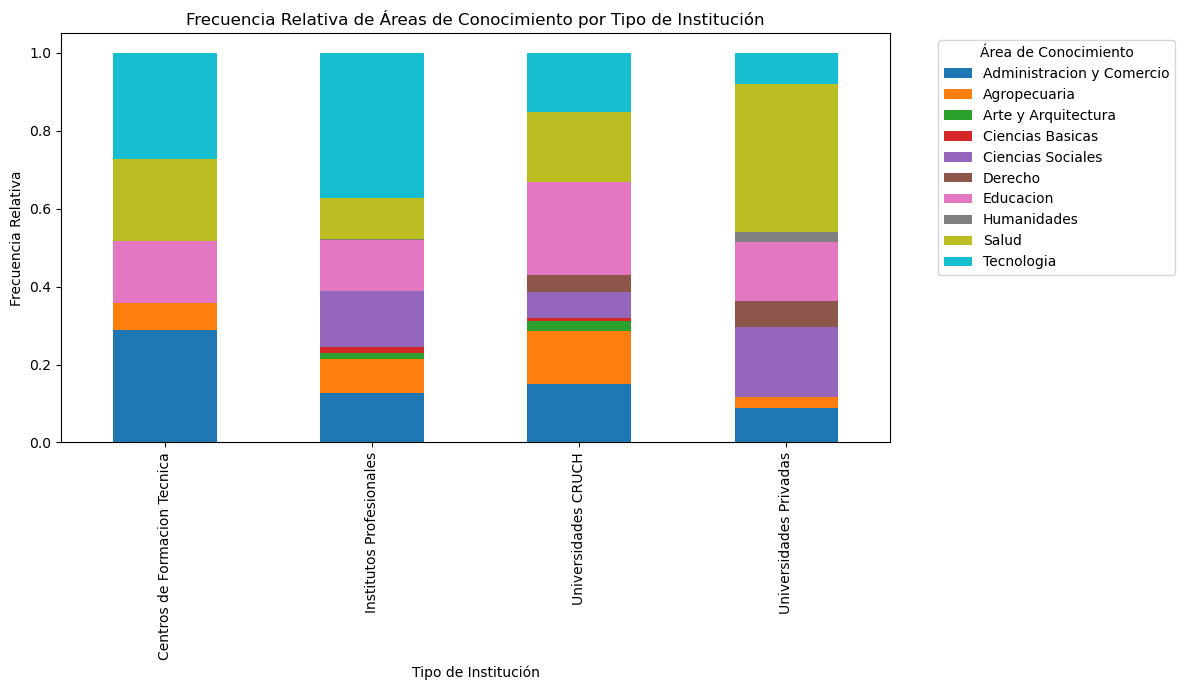

In [6]:
# frecuencia relativa de las areas de conocimiento por tipo de institucion
area_tipo_freq = df.pivot_table(index='TIPO DE INSTITUCION', columns='AREA CONOCIMIENTO', aggfunc='size', fill_value=0)
area_tipo_freq = area_tipo_freq.div(area_tipo_freq.sum(axis=1), axis=0).reset_index()
area_tipo_freq.plot(x='TIPO DE INSTITUCION', kind='bar', stacked=True, figsize=(12, 7))
plt.title('Frecuencia Relativa de Áreas de Conocimiento por Tipo de Institución')
plt.ylabel('Frecuencia Relativa')
plt.xlabel('Tipo de Institución')
plt.legend(title='Área de Conocimiento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


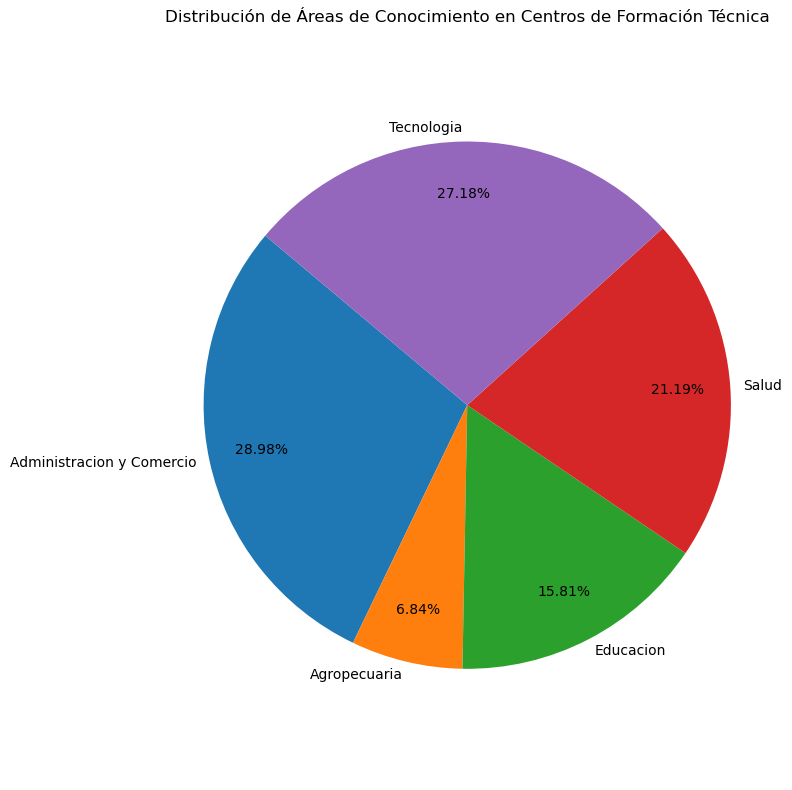

Número de categorías mostradas: 5
AREA CONOCIMIENTO
Administracion y Comercio    0.289765
Agropecuaria                 0.068449
Educacion                    0.158083
Salud                        0.211864
Tecnologia                   0.271838
Name: Centros de Formacion Tecnica, dtype: float64


In [ ]:
# frecuencia relativa de las areas de conocimiento por tipo de institucion, grafico de tortas
# grafico de torta de Centros de Formación Técnica
# inspección rápida y agrupado de pequeñas categorías para evitar etiquetas montadas
cft_data = area_tipo_freq[area_tipo_freq['TIPO DE INSTITUCION'] == 'Centros de Formacion Tecnica'].set_index('TIPO DE INSTITUCION').T
# convertir a serie y asegurarse que son numéricas
cft = pd.to_numeric(cft_data['Centros de Formacion Tecnica'], errors='coerce').fillna(0)
# eliminar ceros
cft = cft[cft > 0]
# agrupar categorías muy pequeñas en 'Otros' para reducir solapamiento (umbral 1%)
threshold = 0.01
small_sum = cft[cft < threshold].sum()
cft = cft[cft >= threshold].copy()
if small_sum > 0:
    cft['Otros'] = small_sum

# plot con ajustes para reducir solapamiento
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(cft.values, labels=cft.index, autopct='%1.2f%%', startangle=140, pctdistance=0.8, labeldistance=1.05)
ax.axis('equal')  # asegura que el pie sea circular
plt.title('Distribución de Áreas de Conocimiento en Centros de Formación Técnica')
plt.tight_layout()
plt.show()

# resumen numérico
print('Número de categorías mostradas:', len(cft))
print(cft.head())


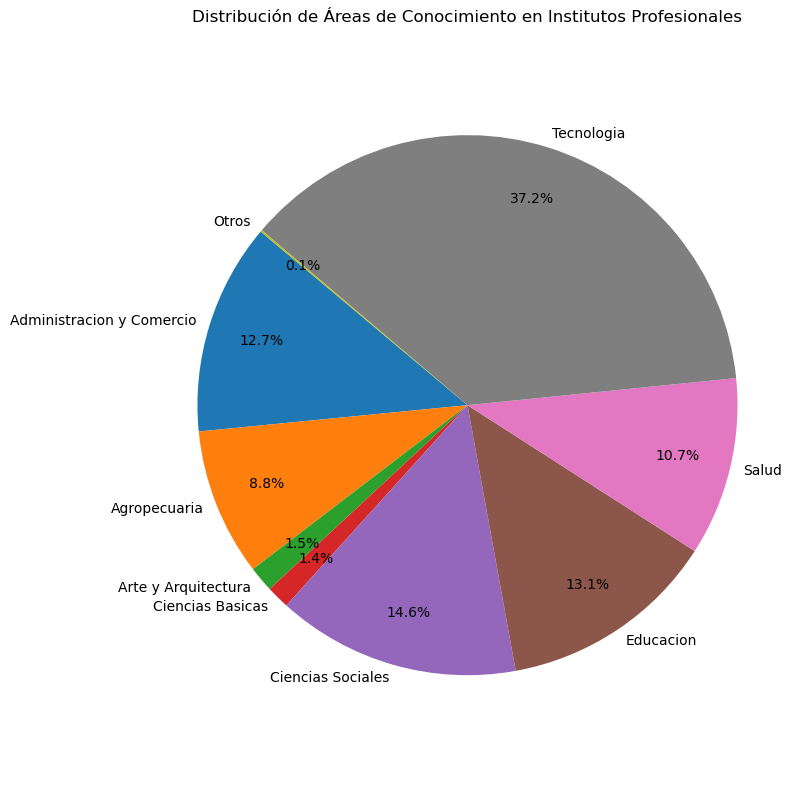

Número de categorías mostradas: 9
AREA CONOCIMIENTO
Administracion y Comercio    0.126670
Agropecuaria                 0.088324
Arte y Arquitectura          0.015295
Ciencias Basicas             0.013787
Ciencias Sociales            0.145627
Name: Institutos Profesionales, dtype: float64


In [21]:
# frecuencia relativa de las areas de conocimiento por tipo de institucion, grafico de tortas
# grafico de torta de Institutos Profesionales
ip_data = area_tipo_freq[area_tipo_freq['TIPO DE INSTITUCION'] == 'Institutos Profesionales'].set_index('TIPO DE INSTITUCION').T    
# convertir a serie y asegurarse que son numéricas
ip = pd.to_numeric(ip_data['Institutos Profesionales'], errors='coerce').fillna(0)
# eliminar ceros
ip = ip[ip > 0]
# agrupar categorías muy pequeñas en 'Otros' para reducir solapamiento (umbral 1%)
threshold = 0.01
small_sum = ip[ip < threshold].sum()
ip = ip[ip >= threshold].copy()
if small_sum > 0:
    ip['Otros'] = small_sum

# plot con ajustes para reducir solapamiento
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(ip.values, labels=ip.index, autopct='%1.1f%%', startangle=140, pctdistance=0.8, labeldistance=1.05)
ax.axis('equal')
plt.title('Distribución de Áreas de Conocimiento en Institutos Profesionales')
plt.tight_layout()
plt.show()

# resumen numérico
print('Número de categorías mostradas:', len(ip))
print(ip.head())


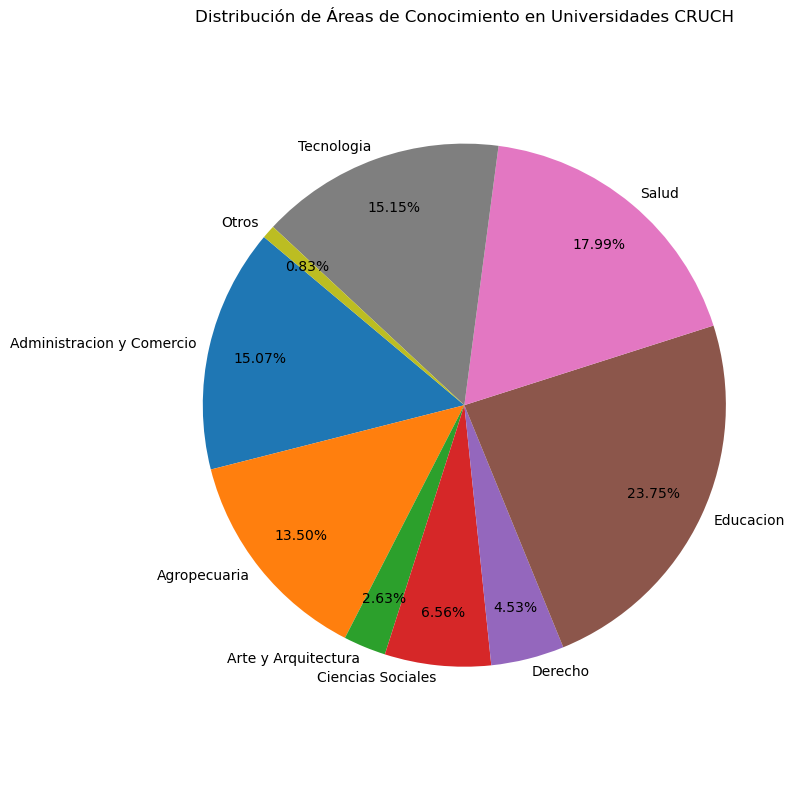

Número de categorías mostradas: 9
AREA CONOCIMIENTO
Administracion y Comercio    0.289765
Agropecuaria                 0.068449
Educacion                    0.158083
Salud                        0.211864
Tecnologia                   0.271838
Name: Centros de Formacion Tecnica, dtype: float64


In [24]:
# frecuencia relativa de las areas de conocimiento por tipo de institucion, grafico de tortas
# grafico de torta de Universidades CRUCH
# inspección rápida y agrupado de pequeñas categorías para evitar etiquetas montadas
cruch_data = area_tipo_freq[area_tipo_freq['TIPO DE INSTITUCION'] == 'Universidades CRUCH'].set_index('TIPO DE INSTITUCION').T
# convertir a serie y asegurarse que son numéricas
cruch_data = pd.to_numeric(cruch_data['Universidades CRUCH'], errors='coerce').fillna(0)
# eliminar ceros
cruch_data = cruch_data[cruch_data > 0]
# agrupar categorías muy pequeñas en 'Otros' para reducir solapamiento (umbral 1%)
threshold = 0.01
small_sum = cruch_data[cruch_data < threshold].sum()
cruch_data = cruch_data[cruch_data >= threshold].copy()
if small_sum > 0:
    cruch_data['Otros'] = small_sum

# plot con ajustes para reducir solapamiento
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(cruch_data.values, labels=cruch_data.index, autopct='%1.2f%%', startangle=140, pctdistance=0.8, labeldistance=1.05)
ax.axis('equal')  # asegura que el pie sea circular
plt.title('Distribución de Áreas de Conocimiento en Universidades CRUCH')
plt.tight_layout()
plt.show()

# resumen numérico
print('Número de categorías mostradas:', len(cruch_data))
print(cft.head())


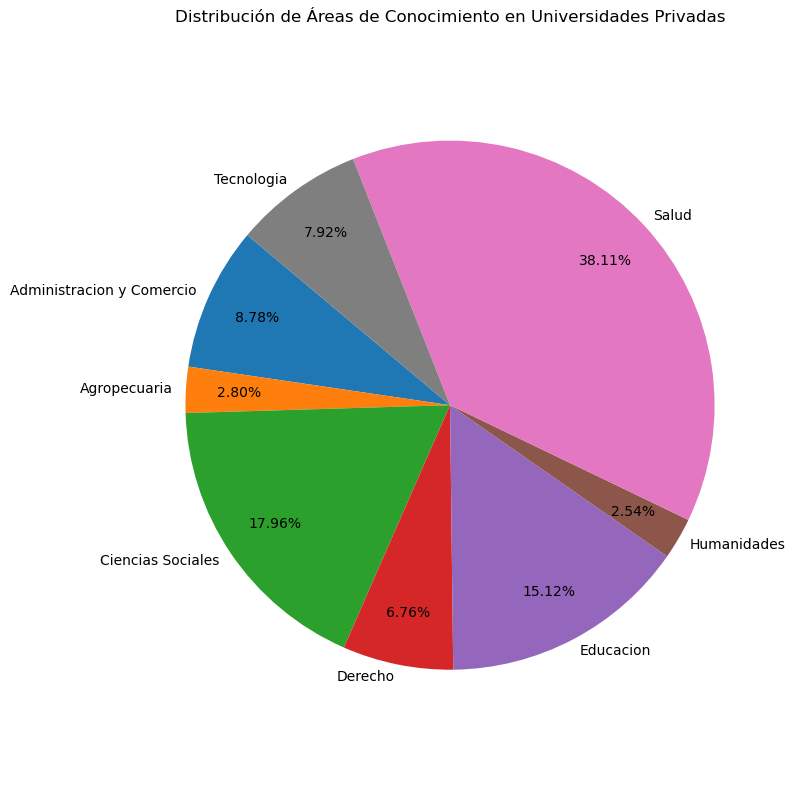

Número de categorías mostradas: 8
AREA CONOCIMIENTO
Administracion y Comercio    0.087811
Agropecuaria                 0.028047
Ciencias Sociales            0.179554
Derecho                      0.067628
Educacion                    0.151245
Name: Universidades Privadas, dtype: float64


In [25]:
# frecuencia relativa de las areas de conocimiento por tipo de institucion, grafico de tortas
# grafico de torta de Universidades Privadas
# inspección rápida y agrupado de pequeñas categorías para evitar etiquetas montadas
privadas_data = area_tipo_freq[area_tipo_freq['TIPO DE INSTITUCION'] == 'Universidades Privadas'].set_index('TIPO DE INSTITUCION').T
# convertir a serie y asegurarse que son numéricas
privadas_data = pd.to_numeric(privadas_data['Universidades Privadas'], errors='coerce').fillna(0)
# eliminar ceros
privadas_data = privadas_data[privadas_data > 0]
# agrupar categorías muy pequeñas en 'Otros' para reducir solapamiento (umbral 1%)
threshold = 0.01
small_sum = privadas_data[privadas_data < threshold].sum()
privadas_data = privadas_data[privadas_data >= threshold].copy()
if small_sum > 0:
    privadas_data['Otros'] = small_sum

# plot con ajustes para reducir solapamiento
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(privadas_data.values, labels=privadas_data.index, autopct='%1.2f%%', startangle=140, pctdistance=0.8, labeldistance=1.05)
ax.axis('equal')  # asegura que el pie sea circular
plt.title('Distribución de Áreas de Conocimiento en Universidades Privadas')
plt.tight_layout()
plt.show()

# resumen numérico
print('Número de categorías mostradas:', len(privadas_data))
print(privadas_data.head())
